### **Unstructed Data Analytics for Policy** (94-775)

### Heinz College, Carnegie Mellon University

### **Final Project**: Text Analysis of COVID-19 related tweets and COVID-19 cases

### *Sydney Joseph (smj), Satvika Neti (sneti), Pooja Puvvadi (ppuvvadi), & Sinduja Sriskanda (ssriskan)*

# **Introduction**


The outbreak of COVID-19 initially detected in December 2019 has spread rapidly to the point that WHO officially declared Sars-COV-2 a global pandemic by March 2020. Currently, there have been around 145 million cases and over 3 million deaths due to this virus. Without any meaningful interventions, such as enforcement of quarantines and social distancing measures, this impact could have been significantly larger. In efforts to combat the virus, many nations have been formulating vaccines to boost immunity among its populations. Evidence has shown that vaccinated people are less likely to be infected and are less likely to spread the diseases to others as well due to herd immunity. 

Despite this solution, public perception of the COVID-19 vaccines has been poliarizing. In the United States, national polls conducted before the COVID-19 vaccines had begun distribution revealed the hesitation many people had about getting vaccinated. Many other countries across the globe, including the United Kingdom and India, are facing similar issues. Due to misinformation and misonceptions about both the illness and the vaccine, many are not completely sold on recieving the COVID-19 vaccine. This uncertainty and unwillingness to get vaccinated could hinder management of the pandemic as many nation are working hard to return to normalcy. 
 
This project aims to evaluate tweets about the COVID-19 vaccines to get a sense of the public perception of the different COVID-19 vaccines and how they have changed over time within the United States, United Kingdom, and India. In addition, this project will analyze these public perceptions in various countries to determine whether there are any significant differences in opinions based on tweets up to April 22, 2021. We believe that this analysis will be useful for:

- Understanding which geographic areas have positive/negative perceptions of the COVID-19 vaccines
- Determining underlying reasons for trust/mistrust of vaccines
- Provide recommendations to help combat misinformation

Note: This dataset ends before the situation in India began to garner international attention. Due to this, we did not focus too much on that for the analysis


# **Environment Set-up**

First, we set up our environment. 

**INSTALL NOTE FOR GRADERS**: if you haven't installed langdetect, textblob, or geopy, you will need to uncomment those lines before running this code chunk.

How long it takes this portion to run: <1 minute

In [1]:
import pandas as pd
import numpy as np
import spacy
import re 
import matplotlib.pyplot as plt
import io
import datetime 
from datetime import date
import sys
#!{sys.executable} -m pip install langdetect #Uncomment this line if you haven't installed langdetect on your device
from langdetect import detect
#!{sys.executable} -m pip install textblob #Uncomment this line if you haven't installed textblob on your device
from textblob import TextBlob
#!{sys.executable} -m pip install geopy #Uncomment this line if you haven't installed geopy on your device
from geopy.geocoders import Nominatim 
from geopy.exc import GeocoderTimedOut
import time
import pickle
#!{sys.executable} -m pip install plotly #Uncomment this line if you haven't installed plotly
import plotly.express as px 
import plotly.graph_objects as go

#ignore warnings in code chunks
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn') 
nlp = spacy.load('en_core_web_sm')
geolocator = Nominatim(user_agent = "geoapiExercises")

In the next section, we will upload the datasets. 

- [All Covid19 Vaccines Tweets on Kaggle](https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets/version/55): This dataset contains all of the tweets worldwide about each COVID vaccine. It uses the Python package TweetPy to collect them, and it is updated daily. The dataset features contain things like: user name, location, and bio; when the account was created and how many followers they have, as well as whether the user is verified; and the tweet ID to view the tweet. 
- [JHU Covid19 Repository](https://github.com/CSSEGISandData/COVID-19_): This dataset is the Johns Hopkins COVID data repository, and has aggregated data on worldwide COVID cases, incidence rates, deaths, and testing rates.
- Sentiment Words: First, we created a csv of sentiment words, one column containing positive sentiment words and the other column containing negative sentiment words. These sentiment words were obtained from GitHub text files (https://github.com/abdulfatir/twitter-sentiment-analysis/tree/master/dataset). We later add covid-specific sentiment words to this sentiment words dataset to create a more targeted sentiment analysis training model. 


# **Data Import & Cleaning**

Data cleaning was a huge part of this project. Especially because the dataset was so large, we needed to make sure both datasets were as clean as possible before heading into analysis. Data cleaning looked different for each dataset. 

**IMPORTANT NOTE FOR GRADERS:** This section is the section that takes a long time to run. When grading, please do not run these chunks and instead go down to the "Upload Clean Data" chunk and run that instead. All related datasets are in the folder this notebook is in. 

**Data Cleaning: COVID-19 Cases**

We downloaded COVID-19 case data from the John's Hopkins University COVID data repository. 
- First, we filtered down to the countries that we are interested in analyzing: India, the US, and the UK. Next, we created a subset of case data from 12/8/2020-4/22/2021 to match the timeframe of our tweet data. 
- Second, we adjusted the data to reflect daily new cases, rather than cumulative totals. 
We exported this cleaned COVID-19 case dataset as a csv, and re-import it later in our analysis.

In [5]:
# tweets = pd.read_csv('vaccination_all_tweets.csv')
# covidcases = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [6]:
# #Data Cleaning: Location

# #Country Filters: US, United Kingdom, India
# #print(covidcases['Country/Region'].unique())

# covid_cases_India = covidcases[covidcases['Country/Region'].str.contains('India', na = False)] #creating a dataframe of India cases
# covid_cases_US = covidcases[covidcases['Country/Region'].str.contains('US', na = False)] #creating a dataframe of US cases
# covid_cases_UK = covidcases[covidcases['Country/Region'].str.contains('United Kingdom', na = False)] #creating a dataframe of UK cases

# #Remove British Colonies/Provinces
# #print(covid_cases_UK['Province/State'].unique())
# UK_provinces = ['Anguilla', 'Bermuda', 'British Virgin Islands', 'Cayman Islands', 'Channel Islands', 'Falkland Islands (Malvinas)', 'Gibraltar', 'Isle of Man', 'Montserrat', 'Saint Helena, Ascension and Tristan da Cunha', 'Turks and Caicos Islands']
# # print(covid_cases_UK) #used to locate the UK's cases
# covid_cases_UK = covid_cases_UK.iloc[[11]]

# #Merge Country Datasets back together
# covid_cases_IndiaUS = covid_cases_India.append(covid_cases_US)
# covid_cases_IndiaUSUK = covid_cases_IndiaUS.append(covid_cases_UK)

# #Date Cleaning: Date

# # First vaccine tweet: 12/12/2020
# # First US vaccine: 12/14/2020
# # First UK vaccine: 12/8/2020
# # First India vaccine: 1/16/2021
# #Remove columns 1/22/20-12/7/2020

# January2020 = ['1/22/20','1/23/20','1/24/20','1/25/20','1/26/20','1/27/20','1/28/20','1/29/20','1/30/20','1/31/20']
# February2020 = []
# for i in range(1,30): 
#     February2020.append('2/' + str(i) + '/20')
# March2020 = []
# for i in range(1,32): 
#     March2020.append('3/' + str(i) + '/20')
# April2020 = []
# for i in range(1,31): 
#     April2020.append('4/' + str(i) + '/20')
# May2020 = []
# for i in range(1,32): 
#     May2020.append('5/' + str(i) + '/20')
# June2020 = []
# for i in range(1,31): 
#     June2020.append('6/' + str(i) + '/20')
# July2020 = []
# for i in range(1,32): 
#     July2020.append('7/' + str(i) + '/20')
# August2020 = []
# for i in range(1,32): 
#     August2020.append('8/' + str(i) + '/20')
# September2020 = [] 
# for i in range(1,31): 
#     September2020.append('9/' + str(i) + '/20')
# October2020 = []
# for i in range(1,32): 
#     October2020.append('10/' + str(i) + '/20')
# November2020 = []
# for i in range(1,31): 
#     November2020.append('11/' + str(i) + '/20')
# December2020 = ['12/1/20','12/2/20','12/3/20','12/4/20','12/5/20','12/6/20','12/7/20']

# covid_cases_3 = covid_cases_IndiaUSUK.drop(['Province/State', 'Lat', 'Long'], axis = 1)
# covid_cases_3 = covid_cases_3.drop(January2020, axis = 1)
# covid_cases_3 = covid_cases_3.drop(February2020, axis = 1)
# covid_cases_3 = covid_cases_3.drop(March2020, axis = 1)
# covid_cases_3 = covid_cases_3.drop(April2020, axis = 1)
# covid_cases_3 = covid_cases_3.drop(May2020, axis = 1)
# covid_cases_3 = covid_cases_3.drop(June2020, axis = 1)
# covid_cases_3 = covid_cases_3.drop(July2020, axis = 1)
# covid_cases_3 = covid_cases_3.drop(August2020, axis = 1)
# covid_cases_3 = covid_cases_3.drop(September2020, axis = 1)
# covid_cases_3 = covid_cases_3.drop(October2020, axis = 1)
# covid_cases_3 = covid_cases_3.drop(November2020, axis = 1)
# covid_cases_clean = covid_cases_3.drop(December2020, axis = 1)


# #CHANGE DATA FROM CUMULATIVE TO DAILY NEW CASES
# #India
# covid_cases_India = covid_cases_clean[covid_cases_clean['Country/Region'].str.contains('India', na = False)] #creating a dataframe of India cases
# covid_cases_India = covid_cases_India.drop('Country/Region', axis = 1)
# covid_cases_India = covid_cases_India.transform(func = lambda x: x-9703770) #9703770 is the number of India cases 1 day before our time cutoff
# covid_cases_India['Country/Region'] = 'India'
# col = covid_cases_India.pop('Country/Region')
# covid_cases_India.insert(0, col.name, col)

# #UK
# covid_cases_UK = covid_cases_clean[covid_cases_clean['Country/Region'].str.contains('United Kingdom', na = False)] #creating a dataframe of India cases
# covid_cases_UK = covid_cases_UK.drop('Country/Region', axis = 1)
# covid_cases_UK = covid_cases_UK.transform(func = lambda x: x-1737960) #1737960 is the number of UK cases 1 day before our time cutoff
# covid_cases_UK['Country/Region'] = 'United Kingdom'
# col = covid_cases_UK.pop('Country/Region')
# covid_cases_UK.insert(0, col.name, col)

# #US
# covid_cases_US = covid_cases_clean[covid_cases_clean['Country/Region'].str.contains('US', na = False)] #creating a dataframe of India cases
# covid_cases_US = covid_cases_US.drop('Country/Region', axis = 1)
# covid_cases_US = covid_cases_US.transform(func = lambda x: x-15108918) #15108918 is the number of US cases 1 day before our time cutoff
# covid_cases_US['Country/Region'] = 'US'
# col = covid_cases_US.pop('Country/Region')
# covid_cases_US.insert(0, col.name, col)

# #Merge the country dataframes back together
# covid_cases_IndiaUS = covid_cases_India.append(covid_cases_US)
# covid_cases_3 = covid_cases_IndiaUS.append(covid_cases_UK)

# #Transpose dataframe
# covid_cases_T = covid_cases_3.transpose()
# covid_cases_T = covid_cases_T.reset_index()
# #covid_cases_T = covid_cases_T.rename(columns = {'index':'Date'})
# ccc = covid_cases_T.values
# covid_cases_cleaned = pd.DataFrame(ccc, columns = ['Date','India','US', 'UK'])
# covid_cases_cleaned = covid_cases_cleaned.drop([0],axis="index")
# covid_cases_cleaned = covid_cases_cleaned.reset_index()
# covid_cases_cleaned = covid_cases_cleaned.drop('index', axis = 1)
# covid_cases_cleaned.head()

# covid_cases_daily = covid_cases_cleaned
# india_daily = [32080]
# for i in range(1, len(covid_cases_daily)):
#     j = covid_cases_daily.columns.get_loc('India')
#     k = (covid_cases_daily.iat[i, j] - covid_cases_daily.iat[i - 1, j])
#     india_daily.append(k)
# covid_cases_daily['India Daily New Cases'] = india_daily
    
# us_daily = [224492]
# for i in range(1, len(covid_cases_daily)):
#     j = covid_cases_daily.columns.get_loc('US')
#     k = (covid_cases_daily.iat[i, j] - covid_cases_daily.iat[i - 1, j])
#     us_daily.append(k)    
# covid_cases_daily['US Daily New Cases'] = us_daily    
    
# uk_daily = [12281]
# for i in range(1, len(covid_cases_daily)):
#     j = covid_cases_daily.columns.get_loc('UK')
#     k = (covid_cases_daily.iat[i, j] - covid_cases_daily.iat[i - 1, j])
#     uk_daily.append(k)
# covid_cases_daily['UK Daily New Cases'] = uk_daily

# covid_cases_daily.head()

,Date,India,US,UK,India Daily New Cases,US Daily New Cases,UK Daily New Cases
0,12/8/20,32080,224492,12281,32080,224492,12281
1,12/9/20,63601,447031,28859,31521,222539,16578
2,12/10/20,92974,678546,49823,29373,231515,20964
3,12/11/20,123005,918523,71495,30031,239977,21672
4,12/12/20,153259,1136108,92996,30254,217585,21501


In [7]:
# #Export the cleaned data into a new CSV so that we don't have to rerun this everytime 
# covid_cases_daily.to_csv('cleaned_covid_case_data.csv')

**Data Cleaning: Tweets**

First, we needed to do basic data cleaning like making sure all the tweet texts were lowercase, and that we were only looking at tweets in English.

In [ ]:
# #LOWER CASE
# for tweet in tweets['text']: 
#     tweet = tweet.lower()

# #LANGUAGE FILTER: Filter to English-only tweets
# #Function from https://stackoverflow.com/questions/43916600/text-language-detection-in-python
# def detect_en(text):
#     try:
#         return detect(text) == 'en'
#     except:
#         return False
# tweets = tweets[tweets['text'].apply(detect_en)]

Then, we needed to filter out user locations so that we could do geographic analysis. To do this, we parsed the user location to see if it held a spacy identified GPE entity label (so that we could filter out user locations like "Your Bed" or "Hell") and filtered the dataset to only real locations. This filtered our dataset from 67,110 to 35,630 tweets. Spacy's GPE entity labels aren't amazing (for example, could not recognize "CA" as a GPE entity as an abbreviation for "California"), so we may have lost some tweets with real locations, but that's a limitation of the library functionality, and we discuss this more in our limitations section. 

We then used the Geolocator library to find the countries for each of the real locations. This part of the data cleaning ran the longest with the multiple calls to the API. 

In [5]:
# #LOCATION FILTERING: removing all fake locations 
# #this function checks to see if in the spacy parsed location, an entity type of GPE exists
# #if so, it is a real location 
# def parse_is_real_loc(loc):
#     if not pd.isnull(loc):
#         parsed_loc = nlp(loc)
#         for token in parsed_loc:
#             if token.ent_type_ == 'GPE':
#                 return True
#         return False 
#     else:
#         return False 

# tweets['real_locs'] = tweets['user_location'].apply(parse_is_real_loc)

# #then we filter based on real locations, losing about ~31,000 tweets without real locations

# #print(len(tweets)) # 67110
# tweets = tweets[tweets['real_locs']] 
# #print(len(tweets)) # 35630

# #add empty column for country and changed it to numpy array for
# #found it easier looping through and keeping track of where errors are occuring

# tweets_meta = np.hstack((np.array(tweets), np.empty([np.array(tweets).shape[0], 1], dtype=str)))

# #function to pull out the country based on location provided on twitter
# #this section of the code takes the longest to run 
# def get_country(loc, recursion=0):
#     try: #will first attempt to obtain location with code
#         return str(geolocator.geocode(loc, timeout=None)).split(',')[-1].strip()
#     except GeocoderTimedOut as e: #exception in place as Geocoder tends to time out
#         if recursion > 10: 
#             return 'error location' #if it couldn't get the country
#         else:
#             time.sleep(1) 
#             return get_country(loc, recursion=recursion + 1) #this will attempt to get the country 10 times

# for i in range(len(tweets_meta)):
#     tweets_meta[i][-1] = get_country(tweets_meta[i][3])
#     # print(counter)
#     # counter += 1

# #convert back into a dataframe for filtering

# tweets_cleaned = pd.DataFrame(tweets_meta, columns = ['Unnamed: 0', 'id', 'user_name', 'user_location', 'user_description',
#        'user_created', 'user_followers', 'user_friends', 'user_favourites',
#        'user_verified', 'date', 'text', 'hashtags', 'source', 'retweets',
#        'favorites', 'is_retweet', 'real_locs', 'real_locs_country'])

# pd.to_csv("intermediate_data_cleaning.csv")

After running that, we save the dataset to a csv and then reupload to continue cleaning. Next, we filtered down to the countries we're interested in analyzing, the United State, the United Kingdom, and India. 

We also do some basic date preprocessing and apply vaccine labels to tweets containing the names of the various vaccines. Each vaccine has it's own column of boolean values of whether that tweet mentioned that vaccine or not. Then, finally we download it as the final cleaned version of the dataset. 

In [41]:
# tweets_cleaned = pd.read_csv("intermediate_data_cleaning.csv")

In [42]:
# #LOCATION FILTERING: filter down to tweets only from the US, UK, and India
# tweets_cleaned = tweets_cleaned[tweets_cleaned['text'].notna()]

# #print(tweets['real_locs_country'].unique()) #need to identify the way these 3 countries are labeled

# tweetsUS = tweets_cleaned[tweets_cleaned['real_locs_country'].str.contains('United States', na=False)] #creating a dataframe of US tweets
# tweetsUK = tweets_cleaned[tweets_cleaned['real_locs_country'].str.contains('United Kingdom', na=False)] #creating a dataframe of UK tweets
# tweetsIndia = tweets_cleaned[tweets_cleaned['real_locs_country'].str.contains('India', na=False)] #creating a dataframe of India tweets

# tweets2 = tweetsUS.append(tweetsUK) #combining the datasets back together
# tweets3 = tweets2.append(tweetsIndia)
# #print(tweets3['real_locs_country'].unique()) #checking that the filtering worked

# #DATE PROCESSING
# tweets3['datetime'] = pd.to_datetime(tweets3['date'])
# tweets3['date'] = pd.to_datetime(tweets3['date']).apply(lambda x: x.date())

# #APPLYING VACCINE LABELS 
# tweets_text = tweets3["text"]

# pfizer = ["pfizer", "pfizerbiontech", "biontech"]
# moderna = ["moderna"]
# jj = ["johnson & johnson", "johnson and johnson", "jnj", "janssen"]
# az = ["astrazeneca"]
# cv = ["covaxin", "bharat"]
# cs = ["covishield"]
# sv = ["sputnikv", "sputnik v"]

# p_label = []
# m_label = []
# jj_label = []
# az_label = []
# cv_label = []
# cs_label = []
# sv_label = []

# for tweet in tweets_text:
#     p_lab = 0
#     m_lab = 0
#     jj_lab = 0
#     az_lab = 0
#     cv_lab = 0
#     cs_lab = 0
#     sv_lab = 0

#     for substr in pfizer:
#         if substr in tweet.lower():
#             p_lab = 1
#     p_label.append(p_lab)
    
#     for substr in moderna:
#         if substr in tweet.lower():
#             m_lab = 1
#     m_label.append(m_lab)

#     for substr in jj:
#         if substr in tweet.lower():
#             jj_lab = 1
#     jj_label.append(jj_lab)

#     for substr in az:
#         if substr in tweet.lower():
#             az_lab = 1
#     az_label.append(az_lab)

#     for substr in cv:
#         if substr in tweet.lower():
#             cv_lab = 1
#     cv_label.append(cv_lab)

#     for substr in cs:
#         if substr in tweet.lower():
#             cs_lab = 1
#     cs_label.append(cs_lab)

#     for substr in sv:
#         if substr in tweet.lower():
#             sv_lab = 1
#     sv_label.append(sv_lab)

# tweets3['pfizer'] = p_label
# tweets3['moderna'] = m_label
# tweets3['jnj'] = jj_label
# tweets3['astrazeneca'] = az_label
# tweets3['covaxin'] = cv_label
# tweets3['covishield'] = cs_label
# tweets3['sputnikv'] = sv_label

In [43]:
# # Export the cleaned data into a new CSV so that we don't have to rerun this everytime 
# tweets3.to_csv('cleaned_tweet_data.csv')

**Upload Clean Data**

Here, we upload the clean versions of both datasets after cleaning, ready for analysis. After cleaning, we are left with 21,920 tweets in the tweets dataset and 143 rows in the covid cases dataset. 

In [2]:
#Upload the clean datasets
tweets_cleaned = pd.read_csv('cleaned_tweet_data.csv')
covid_cases_cleaned = pd.read_csv('cleaned_covid_case_data.csv')
#Upload sentiment word data
sentiment_words = pd.read_csv('sentiment words.csv')

# **Bag of Words Analysis**

**Initial Bag of Words Analysis**

Prior to any analysis, we examined the frequency of words that appeared in the cleaned dataset. In order to compare any differences between the three countries of interest, we counted the frequency of different words across the three countries. In order to capture any variation of words, we counted the number of words in their lemmatized form. 

*How long it takes to run: 12 minutes*

In [3]:
#import everything needed for bag of words
from operator import itemgetter
from collections import Counter

#import nlp spacy
nlp = spacy.load('en_core_web_sm', disable=['ner','parser', 'tagger'])
import logging
logger = logging.getLogger("spacy")
logger.setLevel(logging.ERROR)

manual_stop = ['#', '-pron-'] #maybe add emojis here? 

#created function to parse through text and obtain the .lemma_.lower() of each word, 
#removing the word if it is a stop work or punctuation 
def parse_text(text):
  parsed = nlp(text)
  parsed_cleaned = [token.lemma_.lower() for token in parsed if not (nlp.vocab[token.lemma_.lower()].is_stop \
                                                                     or token.pos_ == 'PUNCT' \
                                                                     or token.pos_ == 'SPACE' \
                                                                     or (token.lemma_.lower() in manual_stop)) \
                                                                and re.match('[a-zA-Z]+$', token.lemma_.lower())]
  return parsed_cleaned

#duplicated final data for any adjustments needed for this section and converted to an array
EDA_data = np.array(tweets_cleaned) 

In [4]:
# Top words across all countries 
#The purpose of this is to explore the words that appear in the 
#Run time: 12 minutes

histogram = Counter()

#loop through the dataset and parse the text using the parse_text() function created earlier
for i in range(len(EDA_data)):
    text_list = parse_text(EDA_data[i][13])
    for word in text_list:
      histogram[word] += 1
    #print(i)

#sort the counter
histogram_token_count_pairs = sorted(histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))


In [5]:
#View top 100 words that appear in the dataset

print("Word               Count")
print("------------------------")
for tup in histogram_token_count_pairs[0:100]:
    print('%-10s' '%s' % (tup[0],tup[1]))

Word               Count
------------------------
vaccine   7886
moderna   7064
covaxin   4455
dose      2664
got       2215
shot      1949
india     1825
today     1719
covid     1578
pfizer    1548
second    1457
vaccinated1438
vaccines  1364
sputnikv  1252
amp       1220
pfizerbiontech1155
covidvaccine1130
vaccination997
oxfordastrazeneca979
covishield858
people    775
doses     760
use       671
getting   645
thank     643
like      637
jab       637
day       636
arm       629
received  581
pm        565
coronavirus564
good      528
efficacy  516
effects   511
astrazeneca493
bharat    474
news      459
new       457
biotech   450
emergency 443
took      438
effective 426
hours     424
russia    412
phase     408
feel      405
sputnik   398
t         397
yesterday 394
v         392
approved  385
health    382
days      379
thanks    376
says      369
time      361
mrna      353
feeling   352
know      345
world     333
govt      333
sore      332
fully     324
data      321
week   

In [30]:
#Explore to see whether the top words are different based on the country 
#Run time: 12 minutes

US_histogram = Counter()
India_histogram = Counter()
UK_histogram = Counter()

for i in range(len(EDA_data)):
    text_list = parse_text(EDA_data[i][13])
    if EDA_data[i][-9] == "United States":
      for word in text_list:
        US_histogram[word] += 1
    elif EDA_data[i][-9] == "India":
      for word in text_list:
        India_histogram[word] += 1
    else:
      for word in text_list:
        UK_histogram[word] += 1


US_histogram_token_count_pairs = sorted(US_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))


UK_histogram_token_count_pairs = sorted(UK_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))

India_histogram_token_count_pairs = sorted(India_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))

In [31]:
print("COUNT FOR UNITED STATES")
print("Word           Count")
print("--------------------")
for tup in US_histogram_token_count_pairs[0:50]:
    print('%-10s' '18%s' % (tup[0],tup[1]))
print("###########################")

print("COUNT FOR UNITED KINGDOM")
print("Word           Count")
print("--------------------")
for tup in UK_histogram_token_count_pairs[0:50]:
    print('%-10s' '18%s' % (tup[0],tup[1]))
print("###########################")

print("COUNT FOR INDIA")
print("Word           Count")
print("--------------------")
for tup in India_histogram_token_count_pairs[0:50]:
    print('%-10s' '18%s' % (tup[0],tup[1]))

COUNT FOR UNITED STATES
Word           Count
--------------------
moderna   186311
vaccine   183867
got       181761
shot      181683
dose      181604
second    181120
today     181034
vaccinated181013
pfizer    181009
covid     18850
covidvaccine18683
vaccines  18660
pfizerbiontech18563
amp       18551
arm       18533
covaxin   18452
getting   18433
day       18426
thank     18401
like      18398
received  18368
hours     18348
vaccination18346
effects   18342
people    18310
fully     18305
sore      18299
feel      18297
mrna      18294
good      18283
yesterday 18278
feeling   18257
doses     18257
thanks    18232
new       18224
days      18222
grateful  18212
week      18201
getvaccinated18196
time      18192
johnsonandjohnson18188
happy     18174
shots     18174
weeks     18171
morning   18169
effective 18164
t         18162
little    18162
science   18159
know      18157
###########################
COUNT FOR UNITED KINGDOM
Word           Count
--------------------
vaccine   181

Observations: Overall, the top 100 word count is very logical and makes sense. For all three countries, the top words were vaccine and the corresponding brands that were associated for each country (i.e moderna/pfizer in US, astrazeneca in the UK, and covaxin/sputnikv/covishield). For each group, we see terminolgoy that are associated with vaccine (i.e arm, receive, effect, sore, shot, etc...). Additionally we also see organizations appear in the list such as Oxford, NHS, Modi, and AIIMS. 

In terms of any sentiment, we don't see anything that is apparent. However, looking at the individual words gives us an idea about words that may be associated with a "positive" sentiative vs a "negative" sentiment for our sentiment analysis later. This includes words such as jab, thankful, and grateful. 

**Bigram and More**

Since counter by single words was not producing a meaningful output, we decided to explore the use of a 3-gram and 4-gram model to derive more meaning. While we did experiment with a bigram model, we felt that the 3-gram and 4-gram model showed more insight into the pattern of words that were appearing. 

*How long it takes to run: 2 minutes*

In [8]:
#Run time: 2 minutes
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

#list of stoplist with the word "https"
stoplist = ["https","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
vectorizer = CountVectorizer(stop_words=stoplist, ngram_range=(3,4))

# matrix of ngrams
ngrams = vectorizer.fit_transform(tweets_cleaned["text"])

# count frequency of ngrams
count = ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = vectorizer.vocabulary_
df = pd.DataFrame(sorted([(count[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'Count', 1:'Word Groupings'})
print(df.head(50))

    Count                         Word Groupings
0     699                       covid 19 vaccine
1     233                     first dose moderna
2     229                         got first dose
3     196                   dose moderna vaccine
4     167                    second dose moderna
5     135                 bharat biotech covaxin
6     125                      covid 19 vaccines
7     121                    second moderna shot
8     108                         got first shot
9     104                       2nd dose moderna
10    103                       moderna covid 19
11     99                 got first dose moderna
12     97                    received first dose
13     96                        got second dose
14     95                    emergency use india
15     95            emergency use authorisation
16     93                        took first dose
17     92             first dose moderna vaccine
18     91                   covid 19 vaccination
19     88           

When intially running it, we were initially encoutnering many word pairs, close to each one including the word "https." To us, this is a clear sign that many tweets are sharing articles about events happening in related to the COVID-19 vaccines are they undergo their clinical trials. However, it removes some of the meaning behind the sentiment so https was added to the stopwords for that reason. When creating a bigram, most combinations was related to vaccine and couldn't drive any meeting. 

Using 3-gram and 4-gram to show up helped provide more insight. As we see, most of the topics surround around obtaining the first dose of the vaccine (especially those those who took moderna). We also see later on in the list that India is tweeting about a variety of topics including emergency use of India, variations of emergency authorizations (which likely belongs to India), and how covaxin neutralizes multiple variants. 

Overall, this hints that it seems like a large portion of tweets are users who are sharing links of articles and are either sharing their thoughts or summarizing the article. 

Using the bag of words analysis has helped us define what these tweets are talking about and most of what they say. Next, we want to see if there is any structure within the text by continuing this analysis using clustering and topic modeling techniques. 

# **Clustering and Topic Modeling**

**Clustering**

We wanted to see if there was any structure within the text of the tweet, so first decided to do some dimensionality reduction to be able to visualize the clusters. 

First, we used the vectorizer function to create a matrix we can use for TSNE. 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_vec = TfidfVectorizer(max_df=0.90,
                      min_df=50,
                      stop_words='english')

text_X = text_vec.fit_transform(tweets_cleaned[pd.notnull(tweets_cleaned['text'])]['text']).toarray()

print(text_vec.vocabulary_)

{'world': 579, 'year': 581, 'vaccination': 547, 've': 557, 'https': 263, 'vaccine': 549, 'coronavirus': 117, 'covidvaccine': 134, 'day': 143, 'pfizerbiontech': 388, 'approval': 47, 'uk': 535, 'people': 385, 'getting': 223, 'vaccinated': 545, 'excited': 188, 'vaccinessavelives': 551, 'vaccineswork': 552, 'effects': 178, 'covid19': 127, 'check': 92, 'great': 238, 'feeling': 201, 'big': 69, 'thank': 513, 'healthcare': 249, 'scientists': 454, 'doctors': 156, 'dose': 163, 'seeing': 457, 'just': 294, 'says': 450, 'continue': 114, '21': 12, 'works': 578, 'article': 53, 'covid': 126, '19': 8, 'vaccinations': 548, 'today': 524, 'state': 488, '100': 2, 'doses': 164, 'week': 569, '30': 17, 'breaking': 79, 'health': 248, 'hospital': 258, 'look': 313, 'pfizer': 387, 'pm': 392, 'announced': 41, 'country': 121, 'biontech': 70, 'vaccines': 550, 'science': 453, 'hope': 257, 'good': 232, 'news': 360, 'night': 362, 'happy': 243, 'way': 566, 'county': 122, 'work': 575, 'received': 424, 'given': 225, 'new'

Then, we created and saved a TSNE model for this matrix. 

In [10]:
from sklearn.manifold import TSNE

#RUN TSNE MODEL FIT, AND THEN SAVE USING NUMPY

#text_tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)

#text_2d = text_tsne.fit_transform(text_X)

#np.save('text_tsne_final.npy', text_2d)

#load pretrained models

text_2d = np.load('text_tsne_final.npy')

Then, we plot the data to see if there are patterns within either the vaccines themselves, or the countries of the tweets. The code to plot the graphs is commented out in the next section, but we've reproduced them as pictures below so they load quicker here.

In [11]:
'''
pfizertweets = text_2d[np.where(tweets_cleaned['pfizer'])]
modernatweets = text_2d[np.where(tweets_cleaned['moderna'])]
jnjtweets = text_2d[np.where(tweets_cleaned['jnj'])]
aztweets = text_2d[np.where(tweets_cleaned['astrazeneca'])]
covtweets = text_2d[np.where(tweets_cleaned['covaxin'])]
covshieltweets = text_2d[np.where(tweets_cleaned['covishield'])]
sputniktweets = text_2d[np.where(tweets_cleaned['sputnikv'])]

fig = go.Figure() 
fig.add_trace(go.Scatter(x=pfizertweets[:,0],
                         y=pfizertweets[:,1],
                         mode='markers',
                        name = 'pfizer'))
fig.add_trace(go.Scatter(x=modernatweets[:,0],
                         y=modernatweets[:,1],
                         mode='markers',
                        name = 'moderna'))
fig.add_trace(go.Scatter(x=jnjtweets[:,0],
                         y=jnjtweets[:,1],
                         mode='markers',
                        name = 'jnj'))
fig.add_trace(go.Scatter(x=aztweets[:,0],
                         y=aztweets[:,1],
                         mode='markers',
                        name = 'astrazeneca'))
fig.add_trace(go.Scatter(x=covtweets[:,0],
                         y=covtweets[:,1],
                         mode='markers',
                        name = 'covaxin'))
fig.add_trace(go.Scatter(x=covshieltweets[:,0],
                         y=covshieltweets[:,1],
                         mode='markers',
                        name = 'covishield'))
fig.add_trace(go.Scatter(x=sputniktweets[:,0],
                         y=sputniktweets[:,1],
                         mode='markers',
                        name = 'sputnik'))
fig.update_layout(title = 'TSNE Output for Text - Vaccine Labels')
fig.show()

ustweets = text_2d[np.where(tweets_cleaned['real_locs_country'] == "United States")]
uktweets = text_2d[np.where(tweets_cleaned['real_locs_country'] == "United Kingdom")]
indiatweets = text_2d[np.where(tweets_cleaned['real_locs_country'] == "India")]

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=ustweets[:,0],
                         y=ustweets[:,1],
                         mode='markers',
                         name = 'US'))
fig2.add_trace(go.Scatter(x=uktweets[:,0],
                         y=uktweets[:,1],
                         mode='markers',
                         name = 'UK'))
fig2.add_trace(go.Scatter(x=indiatweets[:,0],
                         y=indiatweets[:,1],
                         mode='markers',
                         name = 'India'))
fig2.update_layout(title = 'TSNE Output for Text - Country Labels')
fig2.show()
'''

'\npfizertweets = text_2d[np.where(tweets_cleaned[\'pfizer\'])]\nmodernatweets = text_2d[np.where(tweets_cleaned[\'moderna\'])]\njnjtweets = text_2d[np.where(tweets_cleaned[\'jnj\'])]\naztweets = text_2d[np.where(tweets_cleaned[\'astrazeneca\'])]\ncovtweets = text_2d[np.where(tweets_cleaned[\'covaxin\'])]\ncovshieltweets = text_2d[np.where(tweets_cleaned[\'covishield\'])]\nsputniktweets = text_2d[np.where(tweets_cleaned[\'sputnikv\'])]\n\nfig = go.Figure() \nfig.add_trace(go.Scatter(x=pfizertweets[:,0],\n                         y=pfizertweets[:,1],\n                         mode=\'markers\',\n                        name = \'pfizer\'))\nfig.add_trace(go.Scatter(x=modernatweets[:,0],\n                         y=modernatweets[:,1],\n                         mode=\'markers\',\n                        name = \'moderna\'))\nfig.add_trace(go.Scatter(x=jnjtweets[:,0],\n                         y=jnjtweets[:,1],\n                         mode=\'markers\',\n                        name = \'jnj

![Vaccine Label](newplot.png)

![Country Label](newplot1.png)

We can see from the above graphs that at least based on a 2d representation of the tweet data, there doesn't seem to be much structure in the tweet text (and even seems to be one big outlier for some reason). Most of the vaccine labels are everywhere, as are the country labels. The country labels don't seem to correspond (at least not in any discernable way) to the vaccine labels, either. 

Next, we turn to topic modeling to see if we can create structure that way. 

**Topic Modeling**

First, we train the model. 

*How long this section takes to run: <~5 minutes*

In [12]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, random_state=0)
lda.fit(text_X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

Then, using code from lecture, we normalize the topic/word distributions from the model and print out the first 20 words in each topic. 

In [13]:
#code and function taken from lecture

topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

print_top_words(topic_word_distributions, num_top_words, text_vec)

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
https : 0.07533113925074485
people : 0.025978585243164067
covaxin : 0.01934936708899289
vaccination : 0.018455337962671778
vaccine : 0.01729446313258518
vaccines : 0.01611309985471214
year : 0.015173058856434489
18 : 0.01438116827959205
april : 0.014362352969403957
vaccinate : 0.0140603101269362
2021 : 0.013837429655647406
old : 0.013714072513191487
covid19 : 0.013081146909861525
variants : 0.01283331138380771
available : 0.012706120142633557
icmr : 0.01235709230848178
years : 0.012263339498465272
great : 0.012119673480401652
age : 0.011824145374483994
double : 0.011335802736345433

[Topic 1]
efficacy : 0.04904084284322499
covaxin : 0.03968293450021222
phase : 0.036450052526942604
https : 0.032644021218799606
trial : 0.02614782857293439
data : 0.025333092873270072
81 : 0.02496648850564114
clinical : 0.023514566142896272
results : 0.02343610134322921
pandemic : 0.02232662763184819
interim : 0.02

We can see already that there does seem to be distinct groups here - Topic 4 seems to be Russia related, Topic 8 China related, Topic 7 India related, Topic 6 EU/UK related, Topic 1 trial and efficacy related, and Topics 5 and 9 related to people posting about getting vaccinated. 

Next, we plot a TSNE version of this data, using the labels of the topic that a tweet is most likely to correspond to. 

In [14]:
#topic_tsne = TSNE(n_components = 2, angle = 0.99, init = 'pca')  
#topic_2d = topic_tsne.fit_transform(doc_topic_matrix)

#np.save('topic_tsne_final.npy', topic_2d)

topic_2d = np.load('topic_tsne_final.npy')

(-98.00607251950063, 97.00697278805532, -101.82571891240111, 96.03769401005738)

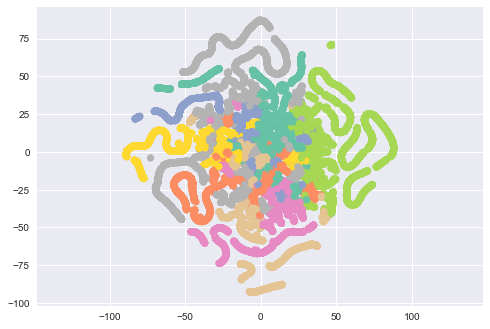

In [15]:
doc_topic_matrix = lda.transform(text_X)
doc_topic_matrix_topprob = np.argmax(doc_topic_matrix, axis = 1)

plt.scatter(topic_2d[:, 0],
            topic_2d[:, 1],
            c=doc_topic_matrix_topprob, cmap='Set2')
plt.axis('equal')  

Here, we finally see real structure and distinct clusters, which implies that topic modeling works well for this dataset. We can see that most of the topics are centered around geography, but also around people posting about getting the vaccine and posting information about it. 

Next, we can use sentiment analysis to see whether these tweets have mostly positive or negative sentiment, and what that might mean within these geographic and vaccine related clusters. 

# **Sentiment Analysis**

*Data Cleaning and Setup*

We took a lexicon-based approach to sentiment analysis because we want to add our own covid-related sentiment words. More about this approach can be found here: https://towardsdatascience.com/design-your-own-sentiment-score-e524308cf787

First, we uploaded a csv of sentiment words, one column containing postitive sentiment wods and the other column containing negative sentiment words. These sentiment words were obtained from GitHub (https://github.com/abdulfatir/twitter-sentiment-analysis/tree/master/dataset). Next, we added covid-specific sentiment words that convey a sentiment more specifically about covid vaccines rather than general sentiment, and then appended those to the lists of general positive sentiment words and general negative sentiment words in order to create a custom list of sentiment words to be used during our analyses.
- Positive Sentiment COVID-19 Vaccine Words: immunity, immune, antibodies, effective, jab, fully, responder, frontline
- Negative Sentiment COVID-19 Vaccine Words: microchip, weapon, biowarfare, imported, plandemic, vaxsparicy, clot, 5g, brainwash, conspiracy, sheep, fake, fetal, gates, ebola, epoch, ploy, gmo, mercola, naturalnews, bukacek, inflated, exaggerated, manipulated

Next, we prepared the data for sentiment analysis by lemmatizing, removing stop words, and stemming words.

We created the following new columns in our dataframe, which we will use throughout our sentiment analysis
- '# positive': the number of positive words in a given tweet (0 to inf)
- '# negative': the number of negative words in a given tweet (0 to inf)
- 'sentiment score': the sentiment score of a given tweet (-inf to inf)
- 'normalized sentiment score': the normalized sentiment score of a given tweet (-1 to 1)
- 'polarity': the polarity of a given tweet (-1[polar negative] to 1[polar positive])
- 'subjectivity': the subjectivity of a given tweet (0 [objective] to 1[subjective])

In the output below, you may examine the first 5 rows of the new sentiment_tweets dataframe

*How long it takes to run this portion*: < 5 minutes

In [16]:
#Import all necessary packages
#from collections import Counter
#import matplotlib.pyplot as plt
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import CountVectorizer
#import sklearn
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

negative_words = sentiment_words['Negative Words'].to_list() #creating a list of general negative sentiment words
positive_words = sentiment_words['Positive Words'].to_list() #creating a list of general positive sentiment words
positive_covid_words = ['immunity', 'immune', 'antibodies', 'effective', 'jab', 'fully', 'responder', 'frontline'] #covid-specific positive sentiment words                                  #does anyone have suggestions for positive covid-related words?
negative_covid_words = ['microchip', 'weapon', 'biowarfare', 'imported', 'plandemic', 'vaxspericy', 'clots', '5g', 'brainwash', 'conspiracy', 'sheep', 'fake', 'fetal', 'gates', 'ebola', 'epoch', 'ploy', 'gmo', 'mercola', 'naturalnews', 'bukacek', 'inflated', 'exaggerated', 'manipulated'] #covid-specific negative sentiment words
positive_words = positive_words + positive_covid_words #combining covid-specific positive sentiment word list and general positive sentiment word list
negative_words = negative_words + negative_covid_words #combining covid-specific negative sentiment word list and general negative sentiment word list
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

sentiment_tweets = tweets_cleaned # Making a copy of the dataset for sentiment analysis, so as not to interfere with the other analyses

#Prepare Data for Sentiment Analysis 
sentiment_tweets = sentiment_tweets.astype({'text': str})
sentiment_tweets['text'] = sentiment_tweets['text'].str.replace('[^\w\s]','') #drop punctuation
sentiment_tweets['text'] = sentiment_tweets['text'].str.split() #split column into list of words for each row
sentiment_tweets['text'] = sentiment_tweets['text'].apply(lambda x: [item for item in x if item not in stop_words])
stemmer = PorterStemmer()
sentiment_tweets['text'] = sentiment_tweets['text'].apply(lambda x: [stemmer.stem(y) for y in x]) #stem words using NLTK package

sentiment_tweets['# positive'] = sentiment_tweets['text'].map(lambda x: len([w for w in x if w in positive_words])) #count number of positive words
sentiment_tweets['# negative'] = sentiment_tweets['text'].map(lambda x: len([w for w in x if w in negative_words])) #count number of negative words
sentiment_tweets['sentiment_score'] = sentiment_tweets['# positive'] - sentiment_tweets['# negative']
sentiment_tweets['normalized_sentiment_score'] = (sentiment_tweets['# positive'] - sentiment_tweets['# negative'])/(len(sentiment_tweets['text']))

sentiment_tweets['text'] = sentiment_tweets['text'].apply(lambda x: [' '.join(x)]) #convert data back to strings for Tfidfvectorizer
sentiment_tweets['text'] = sentiment_tweets['text'].apply(lambda x: ''.join(map(str, x)))
sentiment_tweets['polarity'] = sentiment_tweets['text'].apply(lambda x: TextBlob(x).sentiment.polarity) #calculate polarity
sentiment_tweets['subjectivity'] = sentiment_tweets['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity) #calculate subjectivity

sentiment_tweets.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,user_name,user_location,user_description,user_created,user_followers,user_friends,...,astrazeneca,covaxin,covishield,sputnikv,# positive,# negative,sentiment_score,normalized_sentiment_score,polarity,subjectivity
0,0,0,1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,...,0,0,0,0,0,1,-1,-0.000046,-0.5,0.9
1,8,8,19,1337776763384958976,Alex Vie,"Los Angeles, CA",Marine vet. Yogi. Krav Maga. Runner. Climber. ...,2010-01-24 04:43:57,125,442,...,0,0,0,0,2,1,1,0.000046,-0.5,0.3
2,9,9,21,1337774059237629952,"Richard Dunne, MD","Rochester, NY","Husband, Girl Dad, GI Oncologist @wilmotcancer...",2012-04-23 12:18:55,1982,608,...,0,0,0,0,1,0,1,0.000046,0.0,0.0
3,26,26,51,1338631874814619653,Dr. Taha Khan,India | USA,MD/MPH • PGY1 Peds/Child Neurology @theBCRP (@...,2013-12-30 08:51:23,855,3046,...,0,0,0,0,0,0,0,0.000000,0.0,0.0
4,29,29,55,1338618629667995649,"Nicole Van Groningen, MD","Los Angeles, CA",Assistant Professor of Medicine and Hospitalis...,2014-08-02 02:30:33,1946,807,...,0,0,0,0,0,1,-1,-0.000046,0.0,0.0


*Exploratory Data Analysis: Distribution of Sentiment, Subjectivity, and Polarity*

Before diving into the sentiment analysis, we examined the frequency distribution of polarity and subjectivity.
- Subjectivity Frequency Distribtution: The subjectivity frequency distribution exhibits strong right skew, and a mean subjectivity of 0.21. This suggests that most tweets are fairly objective.
- Polarity Frequency Distribtution: The polarity distribution exhibits a normal distribution, with a mean polarity of 0.08. This suggests that most tweets are neutral.

*How long it takes to run this portion*: < 1 minute

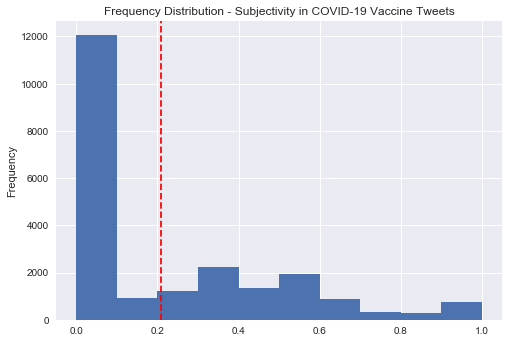

Mean Subjectivity Score: 0.20895785066071879


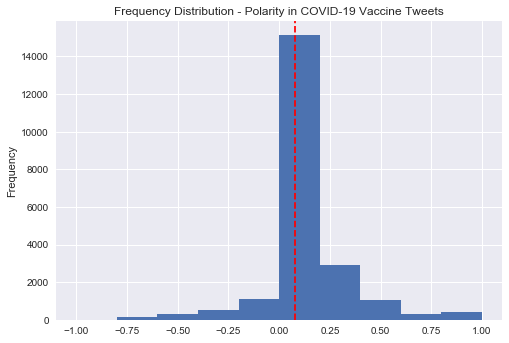

Mean Polarity Score: 0.07726406365477445


In [17]:
#Subjectivity Frequency Distribution
plt.hist(sentiment_tweets['subjectivity'], bins = 10)
plt.gca().set(title='Frequency Distribution - Subjectivity in COVID-19 Vaccine Tweets', ylabel='Frequency')
plt.axvline(sentiment_tweets['subjectivity'].mean(), color='r', linestyle='--')
plt.show()
print('Mean Subjectivity Score:', sentiment_tweets['subjectivity'].mean())

#Polarity Score Frequency Distribution
plt.hist(sentiment_tweets['polarity'], bins = 10)
plt.gca().set(title='Frequency Distribution - Polarity in COVID-19 Vaccine Tweets', ylabel='Frequency')
plt.axvline(sentiment_tweets['polarity'].mean(), color='r', linestyle='--')
plt.show()
print('Mean Polarity Score:', sentiment_tweets['polarity'].mean())

*Sentiment Analysis: geography*

First, we examined subjectivity and polarity by country to see if tweets in different countries differed in polarity and subjectivity.
- Polarity by Country: The mean polarity did not vary greatly from country to country in our analysis.
- Subjectivity by Country: The mean subjectivity did not vary greatly from country to country in our analysis.

How long it takes to run this portion: < 1 minute

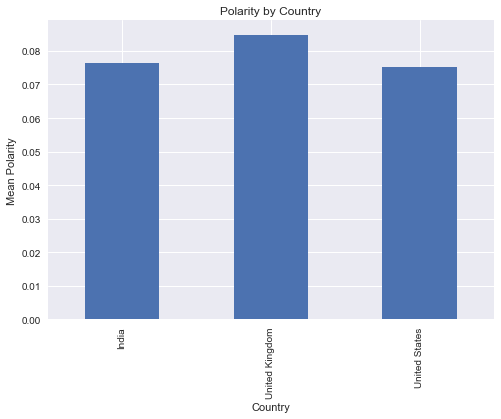

Mean Polarity Score: real_locs_country
India             0.076336
United Kingdom    0.084902
United States     0.075334
Name: polarity, dtype: float64


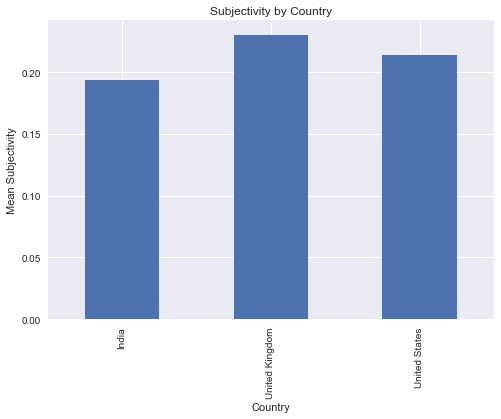

Mean Subjectivity Score: real_locs_country
India             0.193284
United Kingdom    0.230513
United States     0.213566
Name: subjectivity, dtype: float64


In [18]:
#Mean Polarity by Country
sentiment_tweets.groupby('real_locs_country')['polarity'].mean().plot.bar() #plot tweet polarity by country
plt.gca().set(title='Polarity by Country', ylabel='Mean Polarity', xlabel = 'Country')
plt.show()
print('Mean Polarity Score:', sentiment_tweets.groupby('real_locs_country')['polarity'].mean())

#Mean Subjectivity by Country
sentiment_tweets.groupby('real_locs_country')['subjectivity'].mean().plot.bar() #plot tweet subjectivity by country
plt.gca().set(title='Subjectivity by Country', ylabel='Mean Subjectivity', xlabel = 'Country')
plt.show()
print('Mean Subjectivity Score:', sentiment_tweets.groupby('real_locs_country')['subjectivity'].mean())

*Sentiment Analysis: Verification*

Next, we examined subjectivity and polarity by verification status to see if tweets by varified and unverified users differed in polarity and subjectivity.
- Polarity by Verification: The mean polarity did not vary greatly by user verification status.
- Subjectivity by Verification: The mean subjectivity did not vary greatly by user verification status.

How long it takes to run this portion: < 1 minute

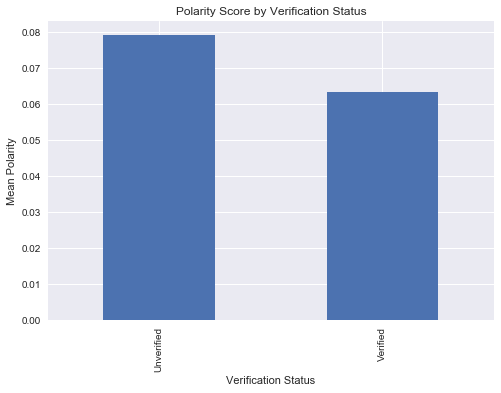

Mean Polarity Score: user_verified
Unverified    0.079185
Verified      0.063310
Name: polarity, dtype: float64


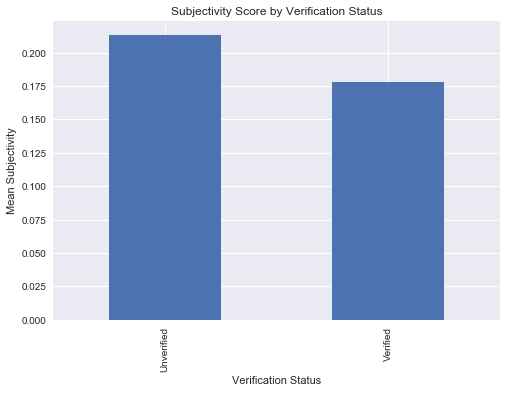

Mean Subjectivity Score: user_verified
Unverified    0.213221
Verified      0.177997
Name: subjectivity, dtype: float64


In [19]:
#Cleaning the User Verified Column and replacing the True/False labels with Verified, Unverified, respectively
sentiment_tweets['user_verified'] = sentiment_tweets['user_verified'].astype(str)
sentiment_tweets['user_verified'] = sentiment_tweets['user_verified'].replace(['False'],'Unverified')
sentiment_tweets['user_verified'] = sentiment_tweets['user_verified'].replace(['True'],'Verified')

#Mean Polarity by Verification Status
sentiment_tweets.groupby('user_verified')['polarity'].mean().plot.bar() #plot tweet polarity by country
plt.gca().set(title='Polarity Score by Verification Status', ylabel='Mean Polarity', xlabel = 'Verification Status')
plt.show()
print('Mean Polarity Score:', sentiment_tweets.groupby('user_verified')['polarity'].mean())

#Mean Subjectivity by Verification Status
sentiment_tweets.groupby('user_verified')['subjectivity'].mean().plot.bar() #plot tweet subjectivity by country
plt.gca().set(title='Subjectivity Score by Verification Status', ylabel='Mean Subjectivity', xlabel = 'Verification Status')
plt.show()
print('Mean Subjectivity Score:', sentiment_tweets.groupby('user_verified')['subjectivity'].mean())

*Sentiment Analysis: Number of Followers*

Here, we examine the relationship between number of followers and polarity and subjectivity.
- Polarity and Number of Followers: there does not appear to be a relationship between number of followers and polarity of tweets. 
- Subjectivity and Number of Followers: there does not appear to be a relationship between number of followers and subjectivity of tweets. 

How long it takes to run this portion: < 1 minute

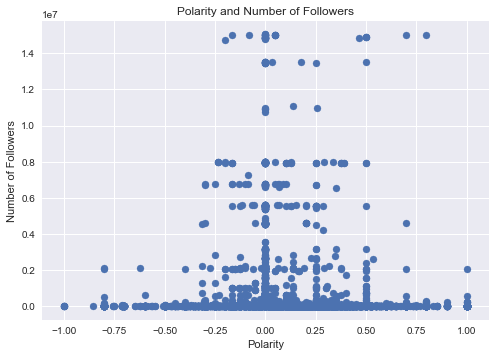

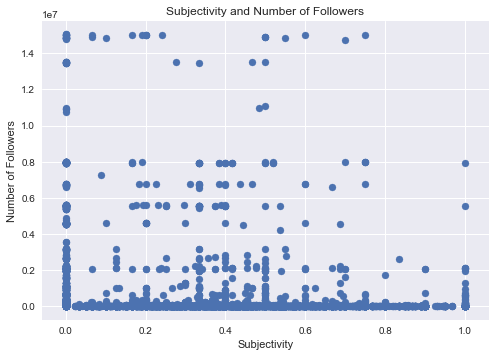

In [20]:
#Change the datatype of user_followers so we can make a scatter plot
sentiment_tweets['user_followers'] = sentiment_tweets['user_followers'].astype(int)

#Polarity and Number of Followers
plt.scatter(sentiment_tweets['polarity'], sentiment_tweets['user_followers'])
plt.gca().set(title='Polarity and Number of Followers', xlabel='Polarity', ylabel = 'Number of Followers')
plt.show()

#Subjectivity and Number of Followers
plt.scatter(sentiment_tweets['subjectivity'], sentiment_tweets['user_followers'])
plt.gca().set(title='Subjectivity and Number of Followers', xlabel='Subjectivity', ylabel = 'Number of Followers')
plt.show()

*Sentiment Analysis: retweets, favorites*

Here, we examine the relationship between tweet interactions (which we define as the sum number of retweets and favorites) and polarity and subjectivity.
- Polarity and Number of Tweet Interactions: there does not appear to be a relationship between number of tweet interactions and polarity of tweets. 
- Subjectivity and Number of Tweet Interactions: there does not appear to be a relationship between number of number of tweet interactions and subjectivity of tweets. 

How long it takes to run this portion: < 1 minute

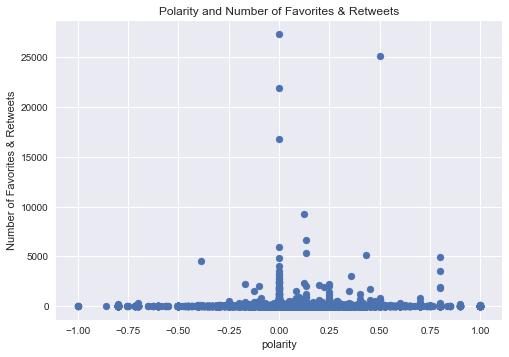

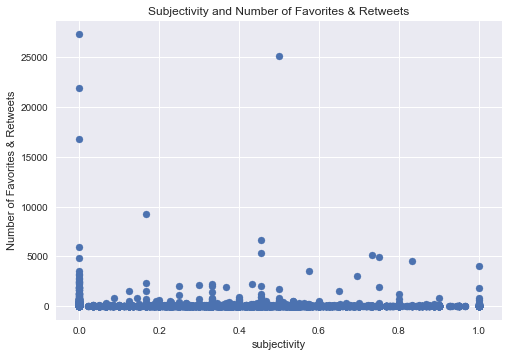

In [21]:
#Create a new column that sums the number of favorites and the number of retweets for each tweet
sentiment_tweets['favorites + retweets'] = sentiment_tweets['retweets'] + sentiment_tweets['favorites']

#Polarity and Number of Retweets
plt.scatter(sentiment_tweets['polarity'], sentiment_tweets['favorites + retweets'])
plt.gca().set(title='Polarity and Number of Favorites & Retweets', xlabel='polarity', ylabel = 'Number of Favorites & Retweets')
plt.show()

#Subjectivity and Number of Retweets
plt.scatter(sentiment_tweets['subjectivity'], sentiment_tweets['favorites + retweets'])
plt.gca().set(title='Subjectivity and Number of Favorites & Retweets', xlabel='subjectivity', ylabel = 'Number of Favorites & Retweets')
plt.show()

*Sentiment Analysis: Vaccines*

Next, we examined subjectivity and polarity by vaccine to see if tweets that mentioned a specific vaccine differed in polarity or subjectivity

*   Polarity by Vaccine: The mean polarity for the sputnik v vaccine was about half the size of the other vaccines, though the polarity of all vaccines was close to zero (neutral).
*   Subjectivity by Vaccine: The mean subjectivity did not vary greatly by vaccine. In addition, the subjectivity for all the vaccines were closer to 0, indicating that the tweets referencing the vaccines by name were more objective.

How long it takes to run this portion: < 1 minute

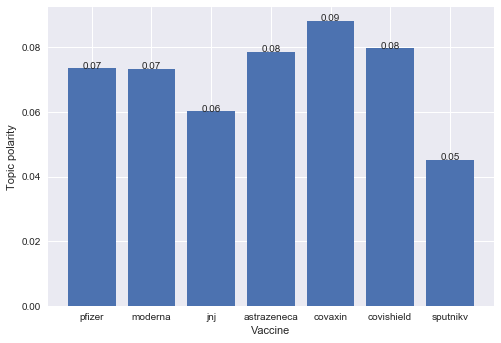

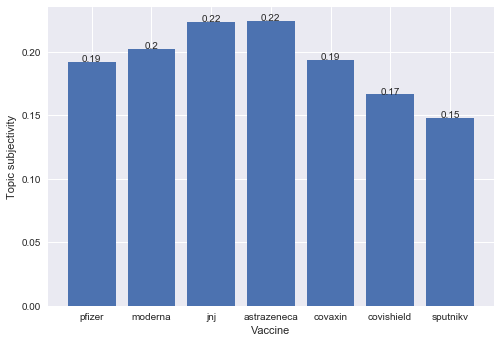

In [22]:
vax_polarity = [sentiment_tweets.loc[sentiment_tweets['pfizer'] == 1]['polarity'].mean(), 
                sentiment_tweets.loc[sentiment_tweets['moderna'] == 1]['polarity'].mean(), 
                sentiment_tweets.loc[sentiment_tweets['jnj'] == 1]['polarity'].mean(),
                sentiment_tweets.loc[sentiment_tweets['astrazeneca'] == 1]['polarity'].mean(),
                sentiment_tweets.loc[sentiment_tweets['covaxin'] == 1]['polarity'].mean(),
                sentiment_tweets.loc[sentiment_tweets['covishield'] == 1]['polarity'].mean(),
                sentiment_tweets.loc[sentiment_tweets['sputnikv'] == 1]['polarity'].mean()]

vax_subjectivity = [sentiment_tweets.loc[sentiment_tweets['pfizer'] == 1]['subjectivity'].mean(), 
                    sentiment_tweets.loc[sentiment_tweets['moderna'] == 1]['subjectivity'].mean(), 
                    sentiment_tweets.loc[sentiment_tweets['jnj'] == 1]['subjectivity'].mean(),
                    sentiment_tweets.loc[sentiment_tweets['astrazeneca'] == 1]['subjectivity'].mean(),
                    sentiment_tweets.loc[sentiment_tweets['covaxin'] == 1]['subjectivity'].mean(),
                    sentiment_tweets.loc[sentiment_tweets['covishield'] == 1]['subjectivity'].mean(),
                    sentiment_tweets.loc[sentiment_tweets['sputnikv'] == 1]['subjectivity'].mean()]

vax_names = ['pfizer', 'moderna', 'jnj', 'astrazeneca', 'covaxin', 'covishield', 'sputnikv']

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i], 2), ha = 'center')

plt.bar(vax_names,vax_polarity)
plt.xlabel("Vaccine")
plt.ylabel("Topic polarity")
addlabels(vax_names, vax_polarity)
plt.show()

plt.bar(vax_names,vax_subjectivity)
plt.xlabel("Vaccine")
plt.ylabel("Topic subjectivity")
addlabels(vax_names, vax_subjectivity)
plt.show()

*Sentiment Analysis: Vaccines over Time*

Next, we examined subjectivity and polarity for each vaccine over time to see if polarity and subjectivity for specific vaccines had changed over time.


* Pfizer: both the polarity and subjectivity are reletively stable.
* Moderna: Polarity in December 2020 started reletively high and then dropped and leveled off, which indicates there may have been some event to lower public opinion of the vaccine, such as discussion of side effects. Subjectivity stayed reletively the same.
* Johnson & Johnson: Mean polarity dropped in April 2021, which was most likely a result of the pause in J&J vaccines due to investigation of the blood clots. Subjectivity stayed reletively the same.
* AstraZeneca: Mean polarity of the vaccine dropped over time, which may be due to confusion around the vaccine. Subjectivity stayed reletively the same.
* Covaxin: Mean polarity and subjectivity both dropped in February 2021 and stayed low, which may have been triggered by an event or discussion around the vaccine.
* Covishield: Mean polarity and subjectivity both dropped in February 2021 and stayed low, which may have been triggered by an event or discussion around the vaccine. Mean polarity, however, had risen a little in the following months. There was reletively high subjectivity in the tweets when the vaccine was first mentioned and then started to get more objective, which could be due to more opinion based tweets in the beginning.
* Sputnik V: Discussion about sputnik v started reletively positive as showcased by the higher bar in December 2020, but drastically lowered in February 2021, which is most likely due to the controversy surrounding the vaccine. Subjectivity stayed reletively the same.

How long it takes to run this portion: < 1 minute

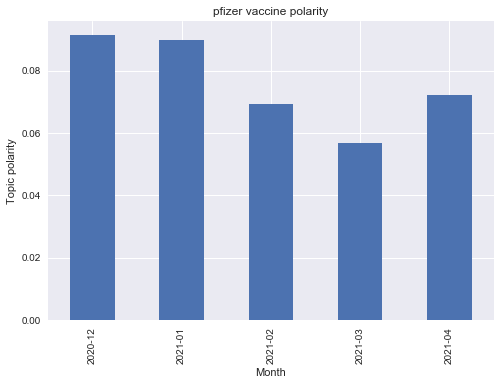

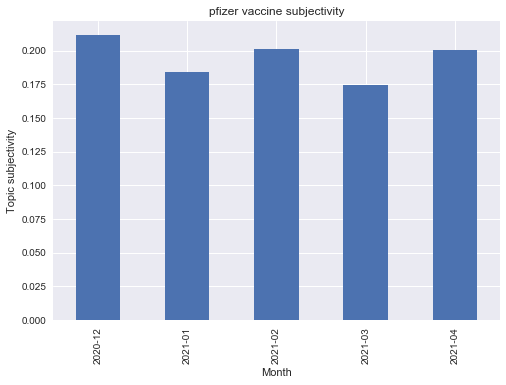

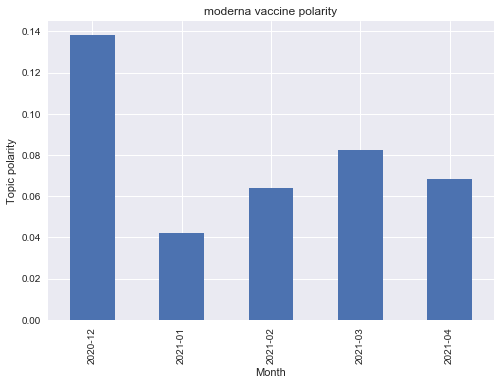

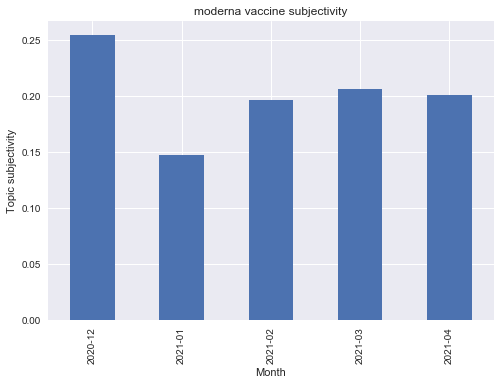

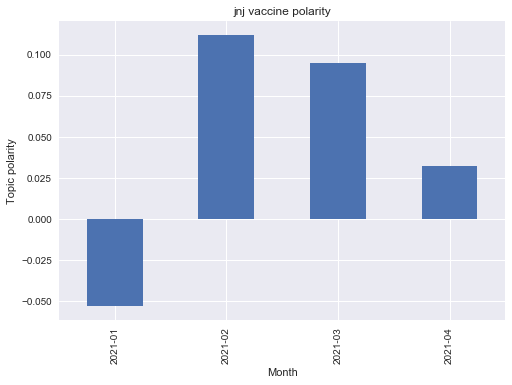

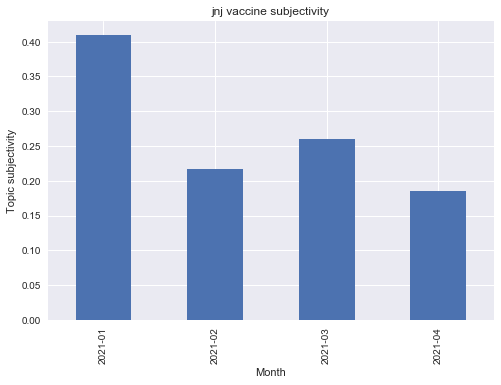

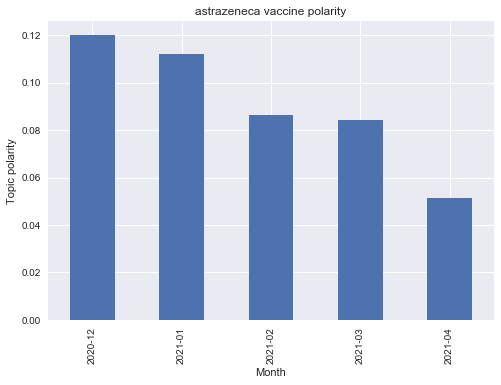

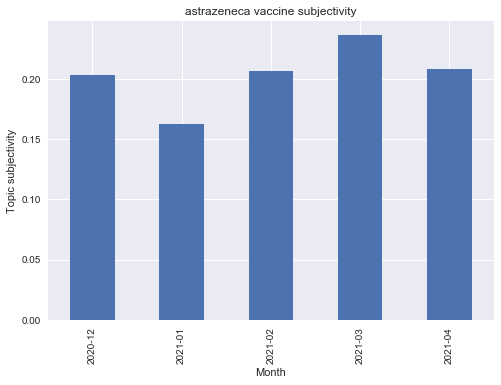

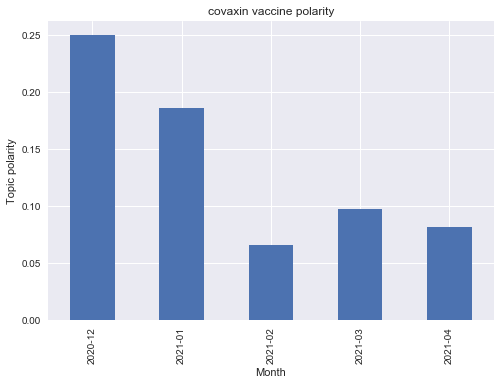

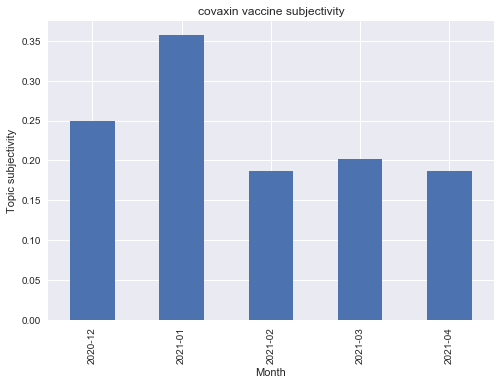

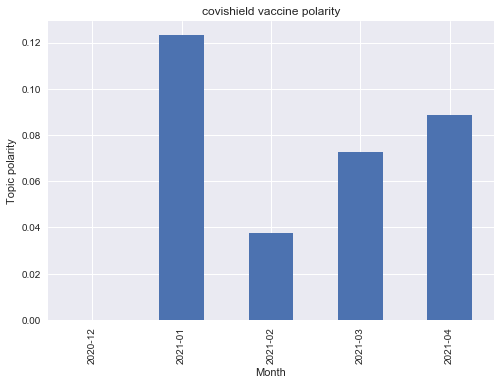

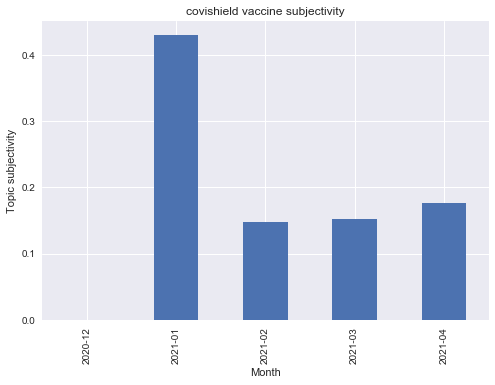

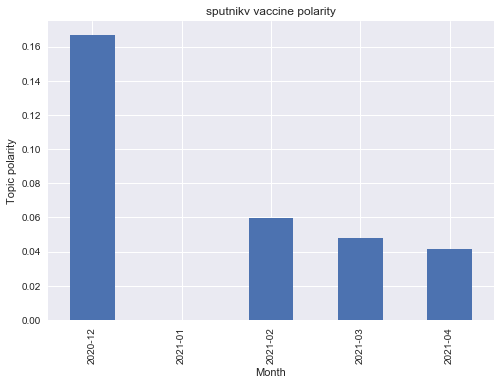

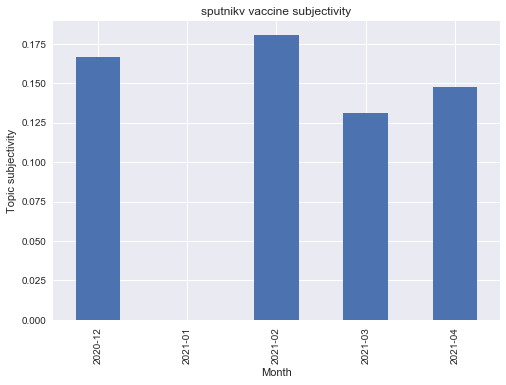

In [23]:
sentiment_tweets['month_year'] = pd.to_datetime(sentiment_tweets['date']).dt.to_period('M')

def plot_vac_month_plot(vax):
  sentiment_tweets.loc[sentiment_tweets[vax] == 1].groupby('month_year')['polarity'].mean().plot.bar()
  plt.title("{} vaccine polarity".format(vax))
  plt.xlabel("Month")
  plt.ylabel("Topic polarity")
  plt.show()

  sentiment_tweets.loc[sentiment_tweets[vax] == 1].groupby('month_year')['subjectivity'].mean().plot.bar()
  plt.title("{} vaccine subjectivity".format(vax))
  plt.xlabel("Month")
  plt.ylabel("Topic subjectivity")
  plt.show()

plot_vac_month_plot("pfizer")
plot_vac_month_plot("moderna")
plot_vac_month_plot("jnj")
plot_vac_month_plot("astrazeneca")
plot_vac_month_plot("covaxin")
plot_vac_month_plot("covishield")
plot_vac_month_plot("sputnikv")

Overall, the tweets in this dataset were mostly neutral and objective, meaning that a majority of the discussion around the vaccines was mostly likely around updates and events surrounding the vaccines rather than opinions about the vaccines. 
	
Some notable findings regarding specific subcategories of tweets were that verified users posted more neutral tweets and objective tweets on average and discussion around specific vaccines started slightly more positive in the beginning and then started to become more neutral over time.  

Due to the relative neutrality and objectivity of the discussion surrounding the vaccines, twitter could be a good place for public officials to focus on to spread more information about the vaccines and vaccine updates. In addition, it could be beneficial for public officials to reach out to verified users who skew toward more neutral and objective tweets to help disseminate information about the vaccines in order to give the public up to date information more quickly. 

# **Context: COVID-19 Daily New Cases**

For context, below are three charts in which the daily new cases of the COVID-19 virus have been reported in India, the US, and the UK.

*How long it takes to run: 2-3 minutes*

In [24]:
#Upload the clean case dataset
covid_cases_cleaned = pd.read_csv('cleaned_covid_case_data.csv')
covid_cases_cleaned.head()

,Unnamed: 0,Date,India,US,UK,India Daily New Cases,US Daily New Cases,UK Daily New Cases
0,0,12/8/20,32080,224492,12281,32080,224492,12281
1,1,12/9/20,63601,447031,28859,31521,222539,16578
2,2,12/10/20,92974,678546,49823,29373,231515,20964
3,3,12/11/20,123005,918523,71495,30031,239977,21672
4,4,12/12/20,153259,1136108,92996,30254,217585,21501


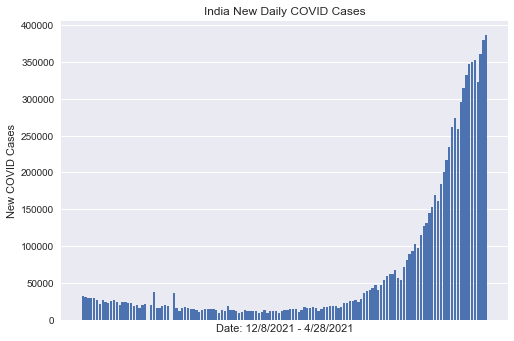

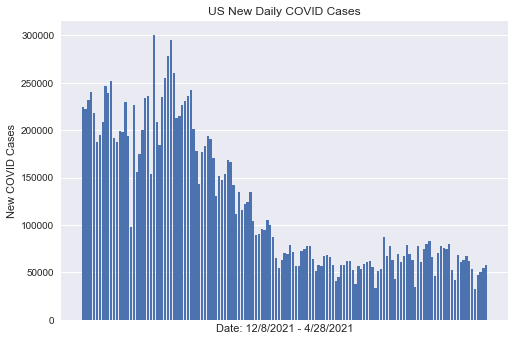

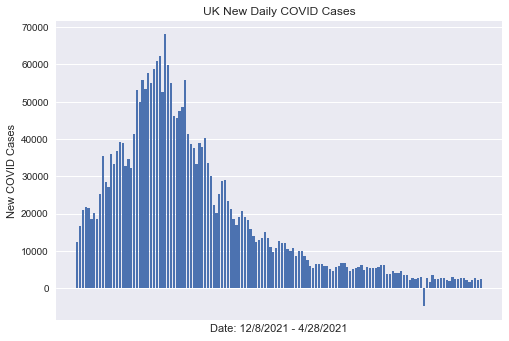

In [25]:
#India Case Data
x = covid_cases_cleaned['Date']
y = covid_cases_cleaned['India Daily New Cases']
plt.bar(x,y)
plt.title('India New Daily COVID Cases')
plt.xlabel('Date: 12/8/2021 - 4/28/2021')
plt.xticks([])
plt.ylabel('New COVID Cases')
plt.show()


#US Case Data
x = covid_cases_cleaned['Date']
y = covid_cases_cleaned['US Daily New Cases']
plt.bar(x,y)
plt.title('US New Daily COVID Cases')
plt.xlabel('Date: 12/8/2021 - 4/28/2021')
plt.xticks([])
plt.ylabel('New COVID Cases')
plt.show()


#UK Case Data
x = covid_cases_cleaned['Date']
y = covid_cases_cleaned['UK Daily New Cases']
plt.bar(x,y)
plt.title('UK New Daily COVID Cases')
plt.xlabel('Date: 12/8/2021 - 4/28/2021')
plt.xticks([])
plt.ylabel('New COVID Cases')
plt.show()

# **Positive & Negative Tweets Analysis**

**Bag of Words**

With sentiment analysis earlier, we used a bag of words to once again compare and contrast the frequencies of words/phrases that appeared between the positive and negative tweets. 

In order to do this, some data pre-processing was required. As sentiment scores were given in a range between -1 to 1, all tweets must be broken up into two groups: tweets with positive sentiment and tweets with negative sentiments. These groups were categorized based on the following criteria: 
Positive tweets: Rows in the dataframe that had a sentiment score greater than 0 
Negative tweets: Rows in the dataframe that had a sentiment score less than 0

Any tweets that had a score of 0 were left out during this analysis as they are categorized as neutral and do not fall in either category. 

*How long it takes to run: 2-3 minutes*

In [26]:
Positive_tweets = sentiment_tweets[(sentiment_tweets.polarity > 0)]
Negative_tweets = sentiment_tweets[(sentiment_tweets.polarity < 0)]

In [27]:
#Bags of Words Analysis
#Run time: < 2 minutes 

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

#list of stoplist with the word "https"
stoplist = ["https","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
pos_vectorizer = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
neg_vectorizer = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))

# matrix of ngrams
pos_ngrams = pos_vectorizer.fit_transform(Positive_tweets["text"])
neg_ngrams = neg_vectorizer.fit_transform(Negative_tweets["text"])

# count frequency of ngrams
pos_count = pos_ngrams.toarray().sum(axis=0)
neg_count = neg_ngrams.toarray().sum(axis=0)

# list of ngrams
pos_vocab = pos_vectorizer.vocabulary_
neg_vocab = neg_vectorizer.vocabulary_

print("Positive Tweets")
df = pd.DataFrame(sorted([(pos_count[i],k) for k,i in pos_vocab.items()], reverse=True)
            ).rename(columns={0: 'Count', 1:'Word Groupings'})
print(df.head(50))

print("               ")
print("Negative Tweets")
df = pd.DataFrame(sorted([(neg_count[i],k) for k,i in neg_vocab.items()], reverse=True)
            ).rename(columns={0: 'Count', 1:'Word Groupings'})
print(df.head(50))

Positive Tweets
    Count            Word Groupings
0     912                first dose
1     647            covid19 vaccin
2     582                 got first
3     500            moderna vaccin
4     334              dose moderna
5     298              covid vaccin
6     272                first shot
7     247              receiv first
8     236        first dose moderna
9     222            got first dose
10    210               side effect
11    202             first moderna
12    201              vaccin today
13    175              moderna shot
14    162                 get first
15    158               second dose
16    152              first vaccin
17    140         receiv first dose
18    137              dose covid19
19    135            pfizer moderna
20    130            vaccin moderna
21    128  oxfordastrazeneca vaccin
22    126       dose covid19 vaccin
23    123                took first
24    123                get vaccin
25    123       dose moderna vaccin
26    119   

Positive tweets seem to be associated with taking the shot. People who wanted to take the shot seem happy about taking the vaccine. Most of the positive words are associated with getting the first and second dose.

Negative tweets seem to be associated about the cost of getting the vaccine. Money seems to be a common theme about this as taxypayers are likely to pay the burden, which is considered a con for some people. "Subject expert" seems to be appearing, which is likely associated with the process of authorizing the use of the different vaccines (which typically require an expert panel).  

**Topic Modeling**

We did a similar analysis to the bag of words one with topic modeling, modeling each of the positive, negative, and neutral tweets separately and printing out the words associated with them. 

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

Positive_tweets = sentiment_tweets[(sentiment_tweets.polarity > 0)]['text']
Negative_tweets = sentiment_tweets[(sentiment_tweets.polarity < 0)]['text']
Neutral_tweets = sentiment_tweets[(sentiment_tweets.polarity == 0)]['text']

pos_vec = TfidfVectorizer(stop_words='english')

neg_vec = TfidfVectorizer(stop_words='english')

neut_vec = TfidfVectorizer(stop_words='english')

pos_X = pos_vec.fit_transform(Positive_tweets).toarray()
neg_x = neg_vec.fit_transform(Negative_tweets).toarray()
neut_x = neut_vec.fit_transform(Negative_tweets).toarray()

lda_pos = LatentDirichletAllocation(n_components=2, random_state=0)
lda_neg = LatentDirichletAllocation(n_components=2, random_state=0)
lda_neut = LatentDirichletAllocation(n_components=2, random_state=0)

lda_pos.fit(pos_X)
lda_neg.fit(neg_x)
lda_neut.fit(neut_x)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=2, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [29]:
topic_word_distributions_pos = np.array([row / row.sum() for row in lda_pos.components_])
topic_word_distributions_neg = np.array([row / row.sum() for row in lda_neg.components_])
topic_word_distributions_neut = np.array([row / row.sum() for row in lda_neut.components_])
num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

print_top_words(topic_word_distributions_pos, num_top_words, pos_vec)
print_top_words(topic_word_distributions_neg, num_top_words, neg_vec)
print_top_words(topic_word_distributions_neut, num_top_words, neut_vec)

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
vaccin : 0.013710682093148966
moderna : 0.012093182738925082
dose : 0.008865847986415742
got : 0.007664998680982111
covid19 : 0.006996698117923523
shot : 0.00657403469944353
covaxin : 0.006124332677320144
today : 0.006050826364506359
covid : 0.004282010261046048
good : 0.0038415602733879502
covidvaccin : 0.003711807969508426
receiv : 0.003689635216612717
second : 0.003667299294628559
feel : 0.003625280994481016
india : 0.003603588035113217
new : 0.0035965251047338567
pfizerbiontech : 0.003484061097747633
effect : 0.0034308404822769533
thank : 0.003246100511970443
im : 0.003214553789631009

[Topic 1]
covaxin : 0.0027800224917451763
vaccin : 0.0024797925779054685
bharatbiotech : 0.0019210493473493032
great : 0.0017816813220910663
sputnikv : 0.0016812208073727693
sure : 0.0016325099578471541
ocugen : 0.0015873404876876915
russia : 0.0015788892248880723
best : 0.0014976138403653277
right : 0.001380

We reached similar conclusions here that we did with the bag of words: positive associations seemed to be about getting the vaccine and being thankful for it, and negative tweets seemed to be about experts, approval process, and getting ill after the vaccine. 

# **Conclusion**

Due to the short time, most of our analysis are preliminary. Additional limitations to consider are the following: 

**Limitations in dataset**

As we began the analysis, we realized that the the questions we posed and the dataset select does not perfectly align. According to the Kaggle site where the dataset is obtained, the tweets were pulled based on the name of the vaccine. However, those who have positive and negative opinions are likely to not attack a specific vaccine brand but rather the whole concept of vaccination and *not* mention the brand when they tweet. As a result, the tweets we are looking for are likely not to be pulled into this dataset. In order to make this stronger, we would need to pull it from Twitter's API ourselves and using general words (i.e "vaccine") to get a more comprehensive dataset rather than just the brand. 

While analyzing, we are working under the assumption that the location the user profile has is the user's true location at the time of the tweet, but that may not be the case. There are scenarios where the user location is outdated and/or the user might be listing another country for another reason beyond the user's location. 

Based off our analysis, it appears that most tweets in our dataset are sharing links to articles related to specific types of vaccines, a brief overview of the article, and *maybe* include their thoughts on it. Because of the character limit and removing the stop words while we are analyzing, we do not have much text per tweet to work with and can come with its own challenges. 

**Limitations in coding**

The first limitation is that those who are tweeting are likely to be using shortened wording (i.e users might be using "u" instead of "you"). Because of the scope of our abilities, we were not able to correct these so all spelling is standarized across all tweets. With this in mind, we are not able to capture all positive and negative words that are spelled a variation of what we have. Additionally, our clustering and the counts we are able to provide are skewed. 

A limitation that can impact the quality of analysis is not able to replace pronouns into nouns. Brands of vaccine and companies are not going to be recongized by the Spacy library. Our analysis would be limited because of that and is likely being filtered out. 

**Recommendations**

Due to the relative neutrality and objectivity of the discussion surrounding the vaccines, twitter could be a good place for public officials to focus on to spread more information about the vaccines and vaccine updates. In addition, it could be beneficial for public officials to reach out to verified users who skew toward more neutral and objective tweets to help disseminate information about the vaccines in order to give the public up to date and accurate information more quickly. 

From the bag-of-words analysis, those who had negative tweets (especially in India) were related to the burden the vaccine may have on taxpayers and who is on the expert committee as the vaccine is authorized to be used for the public. With this in mind, leaders should focus on transparency about the vaccine process. This could include its formulation, the justification behind COVID-19 related interventions, how the government intends to finance it, and who is being selected as subject matter experts in regards to vaccine formulation and bringing the vaccine into the market.  

**Conclusion**

With the rise of social media, many are turning to social media for information in comparison to traditional media outlets. As a byproduct, we are seeing a high amount of misinformation that grew to a high-level during the COVID-19 pandemic. Give the amount of cases and number of deaths, this is as much of a threat to public health compared to the virus.
	
From our analysis, we observe that a majority of tweets have been neutral with people who are likely sharing links to articles and summarizing it rather than stating their opinion clearly. As a result, we recommend that leaders utilize social media to spread information related to COVID-19 and promote transparency about the vaccine. Additionally, leaders can benefit from reaching out to verified users who are skewed towards neutral tweets to help spread accurate information in order to combat misinformation. 
